# EDA

In [1]:
import json
import os
import pandas as pd
import pickle
import pyarrow.parquet as pq
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ruta_absoluta6 = 'C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/2.florida_points.parquet'

data_list = []  # List to store data from the JSON file

# Specify the correct encoding when opening the file
with open(ruta_absoluta6, 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        try:
            datos = json.loads(linea)
            data_list.append(datos)  # Append the JSON data to the list
        except json.JSONDecodeError as e:
            print(f"JSON decoding error: {e}")

# Create a DataFrame from the list of JSON data
df6 = pd.DataFrame(data_list)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 7: invalid start byte

In [5]:
df6.shape

(616160, 23)

In [6]:
df6.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'pics', 'resp',
       'gmap_id', 'name_y', 'address', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url', 'geometry'],
      dtype='object')

In [7]:
df6.state.unique()

array(['Permanently closed', 'Closed ⋅ Opens 6PM', None,
       'Closed ⋅ Opens 9AM Thu', 'Temporarily closed',
       'Open ⋅ Closes 11PM', 'Open ⋅ Closes 10PM',
       'Closed ⋅ Opens 7:30AM Thu', 'Closes soon ⋅ 2:30PM ⋅ Reopens 5PM',
       'Closed ⋅ Opens 3PM', 'Closed ⋅ Opens 9AM', 'Closed ⋅ Opens 4PM',
       'Open 24 hours', 'Closed ⋅ Opens 7AM Wed',
       'Closed ⋅ Opens 2PM Wed', 'Closed ⋅ Opens 11AM Wed',
       'Closed ⋅ Opens 10:30AM Wed', 'Closed ⋅ Opens 11AM Thu',
       'Closed ⋅ Opens 6:30AM', 'Closed ⋅ Opens 12PM',
       'Closed ⋅ Opens 8AM Tue', 'Open ⋅ Closes 2AM',
       'Closed ⋅ Opens 9AM Tue', 'Closed ⋅ Opens 12PM Wed',
       'Closed ⋅ Opens 11AM Tue', 'Closed ⋅ Opens 6PM Wed',
       'Open ⋅ Closes 9PM', 'Closed ⋅ Opens 9AM Mon',
       'Closed ⋅ Opens 11AM', 'Closed ⋅ Opens 8AM',
       'Closed ⋅ Opens 8:30AM', 'Closed ⋅ Opens 5PM',
       'Closed ⋅ Opens 10AM', 'Closed ⋅ Opens 8AM Sat',
       'Closes soon ⋅ 10PM ⋅ Opens 11:30AM Sat', 'Open ⋅ Closes 12AM',


In [8]:
# Saco los registros de restaurantes ya cerrados

df6 = df6[df6["state"]!= "Permanently closed"]

In [9]:
df6.shape

(580920, 23)

Estos estan cerrados, si bien puede ser que se re ubicaron o cerraron completamente, las reviews crreo que no habria que contemplarlas, ya que la experiencia en ese lugar y con esa atencion fue recibida en esos establecimientos. Por ejemplo Sarku sigue vigente pero en otro lugares, casa lario cerro, etc.

Por otro lado, hay algunos que estan temporalmente cerrados, pero no consideramos necesario sacarlos del analisis.

In [10]:
restaurants = df6.name_y.value_counts()
restaurants

McDonald's                          36700
Wendy's                             11077
Chick-fil-A                          9248
Cracker Barrel Old Country Store     8412
IHOP                                 8107
                                    ...  
Coral Gate Café                         3
Villa Fresh Italian Kitchen             3
Mi Tierra Restaurant                    3
Broadway Cafe                           3
La Lunita Coffee Shop                   2
Name: name_y, Length: 2894, dtype: int64

In [11]:
restaurants[restaurants>10]

McDonald's                          36700
Wendy's                             11077
Chick-fil-A                          9248
Cracker Barrel Old Country Store     8412
IHOP                                 8107
                                    ...  
Quesa Loco Food Truck                  11
King creamy seafood                    11
Comadres                               11
EL Fogon de Munchies Boricua           11
La Siesta Taqueria                     11
Name: name_y, Length: 2347, dtype: int64

Hay algunos restaurantes que son cadenas como podemos ver arriba

In [12]:
df6.category

3696                                          ['Restaurant']
3697                                          ['Restaurant']
3698                                          ['Restaurant']
3699                                          ['Restaurant']
3700                                          ['Restaurant']
                                 ...                        
2866445    ['American restaurant', 'Caterer', 'Chicken re...
2866446    ['American restaurant', 'Caterer', 'Chicken re...
2866447    ['American restaurant', 'Caterer', 'Chicken re...
2866448    ['American restaurant', 'Caterer', 'Chicken re...
2866449    ['American restaurant', 'Caterer', 'Chicken re...
Name: category, Length: 580920, dtype: object

In [13]:
df6['category'] = df6['category'].str.strip('[]')
df6.category


3696                                            'Restaurant'
3697                                            'Restaurant'
3698                                            'Restaurant'
3699                                            'Restaurant'
3700                                            'Restaurant'
                                 ...                        
2866445    'American restaurant', 'Caterer', 'Chicken res...
2866446    'American restaurant', 'Caterer', 'Chicken res...
2866447    'American restaurant', 'Caterer', 'Chicken res...
2866448    'American restaurant', 'Caterer', 'Chicken res...
2866449    'American restaurant', 'Caterer', 'Chicken res...
Name: category, Length: 580920, dtype: object

In [14]:
df6['Category_exp'] = df6['category'].str.split(', ')  # Split categories by comma and space

# Count unique categories and create a new DataFrame
unique_category_counts = df6.explode('Category_exp')['Category_exp'].value_counts().reset_index()
unique_category_counts.columns = ['Category_exp', 'Count']

# Display the resulting DataFrame
print(unique_category_counts)

                   Category_exp   Count
0                  'Restaurant'  298708
1         'American restaurant'  174216
2        'Fast food restaurant'  129823
3        'Breakfast restaurant'  118376
4        'Hamburger restaurant'   94716
..                          ...     ...
480      'Distribution service'       6
481      'Wholesale food store'       6
482  'Appliance repair service'       5
483                     'Stage'       5
484           'Cosmetics store'       5

[485 rows x 2 columns]


In [15]:
unique_category_counts.Category_exp.unique()

array(["'Restaurant'", "'American restaurant'", "'Fast food restaurant'",
       "'Breakfast restaurant'", "'Hamburger restaurant'",
       "'Seafood restaurant'", "'Bar'", "'Family restaurant'",
       "'Sandwich shop'", "'Takeout restaurant'", "'Coffee shop'",
       "'Steak house'", "'Bar & grill'", "'Caterer'",
       "'Mexican restaurant'", "'Chicken restaurant'",
       "'Pizza restaurant'", "'Italian restaurant'",
       "'Latin American restaurant'", "'Barbecue restaurant'", "'Diner'",
       "'Sports bar'", "'Takeout Restaurant'", "'Buffet restaurant'",
       "'Brunch restaurant'", "'Southern restaurant (US)'",
       "'Chicken wings restaurant'", "'Cafe'", "'Gluten-free restaurant'",
       "'Tex-Mex restaurant'", "'Sushi restaurant'",
       "'Chinese restaurant'", "'Lunch restaurant'", "'Wine bar'",
       "'Bakery'", "'Asian restaurant'",
       "'Traditional American restaurant'", "'Taco restaurant'",
       "'Delivery service'", "'Cuban restaurant'", "'Gift shop'",
    

Van estas categorias??

- Caterer
- 'Fruit and vegetable store'
-  'Juice shop'
- 'Event planner'
- 'Party equipment rental service'
- 'Gas station'
- 'Alternative fuel station'
- 'ATM'
- 'Convenience store'
- 'Electric vehicle charging station'
- 'Catering'
- 'Fire protection service'
- HVAC contractor
- 'Restaurant supply store'
- Appliance parts supplier
- 'Appliance store'
- 'Commercial refrigerator supplier'
- 'Industrial equipment supplier'
- 'Kitchen supply store'
- 'Small appliance repair service'
- 'Used appliance store'
- Wellness center
- 'Acupuncture clinic'}
- 'Alternative medicine practitioner'
- 'Fitness center'
- 'Hair salon'
- 'Holistic medicine practitioner
- 'Meditation center
- 'Pilates studio'
- 'Yoga studio'
- 'Health spa'
- 'Spa and health club'
- 'Grocery store'
- 'Book store'
- 'Vitamin & supplements store'
- 'Car wash'
- 'Banner store'
- 'Digital printing service'
- 'Print shop'
-  'Market
- 'Dollar store'
- 'Discount store'
- 'General store'
- 'Home goods store'
- 'Office supply store'
- 'Party store'
- 'School supply store'
- 'Variety store'
- 'Software company'
- 'Accounting software company'
- 'Business to business service'
- 'Computer networking center'
- 'Financial institution'
-  'Website designer'
- 'Performing arts group'
- 'Service establishment'
- 'Mobile caterer'
- 'Box lunch supplier'
- 'Indoor playground'
-  "Children's party service"
- 'Park'
- 'Playground'
- 'Video arcade'
- 'Manufacturer'
- 'Horseback riding service'
- 'Pony ride service'
- 'Fresh food market'
- 'Tourist attraction'
- 'Weight loss service'
-  'Eating disorder treatment center'
- 'Wi-Fi spot'
- 'Butcher shop'
- 'Hotel'
-  'Resort hotel'
- 'Dance club'
- 'Airline ticket agency'
-  'Courier service'
- 'Gift shop'
- 'Money transfer service'
-   'Shipping service'
- 'Gym'
- 'Gymnastics center'
- 'Parkour spot'
- 'Rock climbing gym'
- 'Market operator'
- 'Grocery delivery service'
-   'Appliance repair service'
- 'Store'
- 'Condiments supplier'
- 'Recreation center'
- 'Stadium'
- 'Plaza'
- "Children's amusement center"
- 'Art gallery'
- 'Musical club'
- 'Rock music club'
-   'Wellness program'
- 'Liquor store'
-   'Candy store'
- 'Gas company'
- 'Wedding venue'
- 'Hookah store'
- 'Party planner'
- 'Produce wholesaler'
- 'Wholesale grocer'
-  'Drive-in movie theater'
- 'Coaching center'
- 'Chocolate shop'
- 'Corporate office'
-  'Flower delivery'
- 'Milk delivery service'
- 'Adult entertainment club'
- 'Boutique'
- 'Clothing store'
-   'Furniture store'
- 'Vintage clothing store'
- 'Shopping mall'
-   'Movie theater'
- 'Wholesale market'
- 'Dry ice supplier'
-   'Chemical wholesaler'
- 'Industrial gas supplier'
- 'Stage'
-   'Amusement center'
- 'Wedding buffet'
- Food producer
     

In [16]:
categories_not_to_include = ["Caterer", 'Fruit and vegetable store', 'Juice shop', 'Event planner', 'Party equipment rental service', 'Gas station', 'Alternative fuel station', 'ATM', 'Convenience store', 'Electric vehicle charging station', 'Catering', 'Fire protection service', 'HVAC contractor', 'Restaurant supply store',
'Appliance parts supplier', 'Appliance store', 'Commercial refrigerator supplier', 'Industrial equipment supplier', 'Kitchen supply store', 'Small appliance repair service', 'Used appliance store', 'Wellness center', 'Acupuncture clinic', 'Alternative medicine practitioner', 'Fitness center',
'Hair salon', 'Holistic medicine practitioner', 'Meditation center', 'Pilates studio', 'Yoga studio', 'Health spa', 'Spa and health club', 'Grocery store', 'Book store', 'Vitamin & supplements store', 'Car wash', 'Banner store', 'Digital printing service' , 'Print shop',  'Market', 'Dollar store',
'Discount store', 'General store', 'Home goods store', 'Office supply store', 'Party store', 'School supply store', 'Variety store', 'Software company', 'Accounting software company', 'Business to business service', 'Computer networking center', 'Financial institution',  'Website designer', 'Performing arts group'
, 'Service establishment', 'Mobile caterer', 'Box lunch supplier', 'Indoor playground',  "Children's party service", 'Park', 'Playground', 'Video arcade', 'Manufacturer', 'Horseback riding service', 'Pony ride service', 'Fresh food market', 'Tourist attraction', 'Weight loss service', 'Eating disorder treatment center'
, 'Wi,Fi spot', 'Butcher shop', 'Hotel',  'Resort hotel',  'Airline ticket agency',  'Courier service', 'Gift shop', 'Money transfer service',   'Shipping service', 'Gym', 'Gymnastics center', 'Parkour spot', 'Rock climbing gym', 'Market operator', 'Grocery delivery service','Appliance repair service'
, 'Store', 'Condiments supplier', 'Recreation center', 'Stadium', 'Plaza', "Children's amusement center", 'Art gallery',   'Wellness program', 'Liquor store',   'Candy store', 'Gas company', 'Wedding venue', 'Hookah store', 'Party planner', 'Produce wholesaler', 'Wholesale grocer'
,  'Drive-in movie theater', 'Coaching center', 'Chocolate shop', 'Corporate office',  'Flower delivery', 'Milk delivery service', 'Adult entertainment club', 'Boutique', 'Clothing store',   'Furniture store', 'Vintage clothing store', 'Shopping mall',   'Movie theater', 'Wholesale market', 'Dry ice supplier'
,   'Chemical wholesaler', 'Industrial gas supplier', 'Stage',   'Amusement center', 'Wedding buffet', 'Food producer']

In [17]:
# Filter the DataFrame to exclude categories_not_to_include
#filtered_df = df6[~df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]
filtered_df = df6[df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]

# Display the filtered DataFrame
filtered_df.head()


,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,geometry,Category_exp
6608,1.003507e+20,Ashley MacKay,1614534611384,1,Ordering online was super easy! Unfortunately ...,None,None,0x88e76652cd84272f:0x548abb9935d912ff,Subway,"Subway, 588 S Alafaya Trail #30, Orlando, FL 3...",...,4.0,33,$,"[['Wednesday', '9AM–10PM'], ['Thursday', '9AM–...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 9AM Thu,"['0x88e767b6ebb4a1e1:0x13873310e89c5a3', '0x88...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00q\x1f\x14\xef[MT\xc0\x92...,"['Sandwich shop', 'Caterer', 'Fast food restau..."
6609,1.003507e+20,Ashley MacKay,1614534611384,1,Ordering online was super easy! Unfortunately ...,None,None,0x88e76652cd84272f:0x548abb9935d912ff,Subway,"Subway, 588 S Alafaya Trail #30, Orlando, FL 3...",...,4.0,33,$,"[['Wednesday', '9AM–10PM'], ['Thursday', '9AM–...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 9AM Thu,"['0x88e767b6ebb4a1e1:0x13873310e89c5a3', '0x88...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00q\x1f\x14\xef[MT\xc0\x92...,"['Sandwich shop', 'Caterer', 'Fast food restau..."
6610,1.051190e+20,Nova Starduster,1572373620623,5,Subway' have never been a place I though I'd e...,None,None,0x88e76652cd84272f:0x548abb9935d912ff,Subway,"Subway, 588 S Alafaya Trail #30, Orlando, FL 3...",...,4.0,33,$,"[['Wednesday', '9AM–10PM'], ['Thursday', '9AM–...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 9AM Thu,"['0x88e767b6ebb4a1e1:0x13873310e89c5a3', '0x88...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00q\x1f\x14\xef[MT\xc0\x92...,"['Sandwich shop', 'Caterer', 'Fast food restau..."
6611,1.051190e+20,Nova Starduster,1572373620623,5,Subway' have never been a place I though I'd e...,None,None,0x88e76652cd84272f:0x548abb9935d912ff,Subway,"Subway, 588 S Alafaya Trail #30, Orlando, FL 3...",...,4.0,33,$,"[['Wednesday', '9AM–10PM'], ['Thursday', '9AM–...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 9AM Thu,"['0x88e767b6ebb4a1e1:0x13873310e89c5a3', '0x88...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00q\x1f\x14\xef[MT\xc0\x92...,"['Sandwich shop', 'Caterer', 'Fast food restau..."
6612,1.164570e+20,mallory knapp,1560559486349,5,By far the best service from any subways we ha...,None,None,0x88e76652cd84272f:0x548abb9935d912ff,Subway,"Subway, 588 S Alafaya Trail #30, Orlando, FL 3...",...,4.0,33,$,"[['Wednesday', '9AM–10PM'], ['Thursday', '9AM–...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 9AM Thu,"['0x88e767b6ebb4a1e1:0x13873310e89c5a3', '0x88...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00q\x1f\x14\xef[MT\xc0\x92...,"['Sandwich shop', 'Caterer', 'Fast food restau..."


In [18]:
pd.set_option('display.max_colwidth', 300)
# Set the option to display all columns
pd.set_option('display.max_columns', None)

 Pongo a verme los registros a ver si realmente sirven o no esas categorias que a priori parecen erroneas o al menos no de nuestro interes

In [19]:
filtered_df[["name_y", "category"]].head(50)

,name_y,category
6608,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6609,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6610,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6611,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6612,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6613,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6614,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6615,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6616,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"
6617,Subway,"'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Takeout Restaurant', 'Restaurant'"


Aca limpie un poco las categorias que previamente eran hibridas y tras revisar el dataframe anterior filtrado y con gran cantidad de registros, compartian categorias relevantes para nuestra data de restaurantes

In [20]:
categories_not_to_include = ['Event planner', 'Party equipment rental service', 'Gas station', 'Alternative fuel station', 'ATM', 'Electric vehicle charging station', 'Fire protection service', 'HVAC contractor',
'Appliance parts supplier', 'Appliance store', 'Commercial refrigerator supplier', 'Industrial equipment supplier', 'Kitchen supply store', 'Small appliance repair service', 'Used appliance store', 'Wellness center', 'Acupuncture clinic', 'Alternative medicine practitioner', 'Fitness center',
'Hair salon', 'Holistic medicine practitioner', 'Meditation center', 'Pilates studio', 'Yoga studio', 'Health spa', 'Spa and health club', 'Car wash', 'Banner store', 'Digital printing service' , 'Print shop', 'Dollar store',
'Discount store', 'General store', 'Home goods store',  'Party store', 'School supply store', 'Variety store', 'Software company', 'Accounting software company', 'Business to business service', 'Computer networking center', 'Financial institution',  'Website designer', 'Performing arts group'
, 'Service establishment', 'Mobile caterer', 'Box lunch supplier', 'Indoor playground',  "Children's party service", 'Park', 'Playground', 'Video arcade', 'Manufacturer', 'Horseback riding service', 'Pony ride service', 'Tourist attraction', 'Weight loss service', 'Eating disorder treatment center'
, 'Wi,Fi spot', 'Butcher shop', 'Airline ticket agency',  'Courier service', 'Gift shop', 'Money transfer service',   'Shipping service', 'Gym', 'Gymnastics center', 'Parkour spot', 'Rock climbing gym', 'Market operator','Appliance repair service'
,  'Recreation center', 'Stadium', 'Plaza', "Children's amusement center", 'Art gallery',   'Wellness program', 'Liquor store',   'Candy store', 'Gas company', 'Wedding venue', 'Party planner', 'Produce wholesaler',
 'Drive-in movie theater', 'Coaching center', 'Chocolate shop', 'Corporate office',  'Flower delivery', 'Milk delivery service', 'Adult entertainment club', 'Boutique', 'Clothing store',   'Furniture store', 'Vintage clothing store', 'Shopping mall',   'Movie theater', 'Wholesale market', 'Dry ice supplier'
,   'Chemical wholesaler', 'Industrial gas supplier', 'Stage',   'Amusement center', 'Wedding buffet', 'Food producer']

In [21]:
# Filter the DataFrame to exclude categories_not_to_include
#filtered_df = df6[~df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]
filtered_df = df6[df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]

# Display the filtered DataFrame
filtered_df
filtered_df[["name_y", "category"]].tail(50)

,name_y,category
2863471,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863472,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863473,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863474,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863475,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863476,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863477,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863478,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863479,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"
2863480,GameTime Ocoee,"'Video arcade', 'Event venue', 'Restaurant', 'Sports bar'"


In [22]:
check_cat = filtered_df[["name_y", "category"]]
check_cat[check_cat['category'].apply(lambda x: 'Service establishment' in x)]

,name_y,category
327711,Sweetie's BBQ,"'Delivery Restaurant', 'Service establishment'"
327712,Sweetie's BBQ,"'Delivery Restaurant', 'Service establishment'"
327713,Sweetie's BBQ,"'Delivery Restaurant', 'Service establishment'"
327714,Sweetie's BBQ,"'Delivery Restaurant', 'Service establishment'"
327715,Sweetie's BBQ,"'Delivery Restaurant', 'Service establishment'"
...,...,...
753607,CitySpree,"'Delivery Restaurant', 'Advertising agency', 'Service establishment'"
753608,CitySpree,"'Delivery Restaurant', 'Advertising agency', 'Service establishment'"
753609,CitySpree,"'Delivery Restaurant', 'Advertising agency', 'Service establishment'"
753610,CitySpree,"'Delivery Restaurant', 'Advertising agency', 'Service establishment'"


Tambien es relevante

In [23]:
check_cat[check_cat['category'].apply(lambda x: 'Mobile caterer' in x)].head()

,name_y,category
94888,Pizzarello Miami,"'Pizza restaurant', 'Mobile caterer'"
94889,Pizzarello Miami,"'Pizza restaurant', 'Mobile caterer'"
94890,Pizzarello Miami,"'Pizza restaurant', 'Mobile caterer'"
94891,Pizzarello Miami,"'Pizza restaurant', 'Mobile caterer'"
94892,Pizzarello Miami,"'Pizza restaurant', 'Mobile caterer'"


Relevante

In [24]:
check_cat[check_cat['category'].apply(lambda x: 'Tourist attraction' in x)].head()

,name_y,category
26796,IDRIVE ORLANDO (International Drive Orlando),"'Tourist attraction', 'Dinner theater', 'Parking garage', 'Restaurant', 'Shopping mall', 'Theme park'"
26797,IDRIVE ORLANDO (International Drive Orlando),"'Tourist attraction', 'Dinner theater', 'Parking garage', 'Restaurant', 'Shopping mall', 'Theme park'"
26798,IDRIVE ORLANDO (International Drive Orlando),"'Tourist attraction', 'Dinner theater', 'Parking garage', 'Restaurant', 'Shopping mall', 'Theme park'"
26799,IDRIVE ORLANDO (International Drive Orlando),"'Tourist attraction', 'Dinner theater', 'Parking garage', 'Restaurant', 'Shopping mall', 'Theme park'"
26806,IDRIVE ORLANDO (International Drive Orlando),"'Tourist attraction', 'Dinner theater', 'Parking garage', 'Restaurant', 'Shopping mall', 'Theme park'"


Relevabte

In [25]:
check_cat[check_cat['category'].apply(lambda x: 'Weight loss service' in x)].head()

,name_y,category
932100,Jet Fuel Meals,"'Delivery Restaurant', 'Restaurant', 'Weight loss service'"
932101,Jet Fuel Meals,"'Delivery Restaurant', 'Restaurant', 'Weight loss service'"
932102,Jet Fuel Meals,"'Delivery Restaurant', 'Restaurant', 'Weight loss service'"
932103,Jet Fuel Meals,"'Delivery Restaurant', 'Restaurant', 'Weight loss service'"
932104,Jet Fuel Meals,"'Delivery Restaurant', 'Restaurant', 'Weight loss service'"


Relevante

In [26]:
check_cat[check_cat['category'].apply(lambda x: 'Video arcade' in x)].head()

,name_y,category
120172,Main Event Orlando,"'Amusement center', 'Bowling alley', ""Children's party service"", 'Corporate entertainment service', 'Laser tag center', 'New American restaurant', 'Restaurant', 'Video arcade'"
120173,Main Event Orlando,"'Amusement center', 'Bowling alley', ""Children's party service"", 'Corporate entertainment service', 'Laser tag center', 'New American restaurant', 'Restaurant', 'Video arcade'"
120174,Main Event Orlando,"'Amusement center', 'Bowling alley', ""Children's party service"", 'Corporate entertainment service', 'Laser tag center', 'New American restaurant', 'Restaurant', 'Video arcade'"
120175,Main Event Orlando,"'Amusement center', 'Bowling alley', ""Children's party service"", 'Corporate entertainment service', 'Laser tag center', 'New American restaurant', 'Restaurant', 'Video arcade'"
120176,Main Event Orlando,"'Amusement center', 'Bowling alley', ""Children's party service"", 'Corporate entertainment service', 'Laser tag center', 'New American restaurant', 'Restaurant', 'Video arcade'"


Estan ok son restaruantes con estos servicios extra

In [27]:
check_cat[check_cat['category'].apply(lambda x: 'Butcher shop' in x)].head()

,name_y,category
444860,Cajun Specialty Meats,"'Meat processor', 'Butcher shop', 'Caterer', 'Deli', 'Restaurant'"
444861,Cajun Specialty Meats,"'Meat processor', 'Butcher shop', 'Caterer', 'Deli', 'Restaurant'"
444862,Cajun Specialty Meats,"'Meat processor', 'Butcher shop', 'Caterer', 'Deli', 'Restaurant'"
444863,Cajun Specialty Meats,"'Meat processor', 'Butcher shop', 'Caterer', 'Deli', 'Restaurant'"
444864,Cajun Specialty Meats,"'Meat processor', 'Butcher shop', 'Caterer', 'Deli', 'Restaurant'"


Relevante

In [28]:
check_cat[check_cat['category'].apply(lambda x: 'Market operator' in x)].head()

,name_y,category
1401521,Los Gauchitos,"'Restaurant', 'Bakery', 'Market operator', 'Pizza restaurant'"
1401522,Los Gauchitos,"'Restaurant', 'Bakery', 'Market operator', 'Pizza restaurant'"
1401523,Los Gauchitos,"'Restaurant', 'Bakery', 'Market operator', 'Pizza restaurant'"
1401524,Los Gauchitos,"'Restaurant', 'Bakery', 'Market operator', 'Pizza restaurant'"
1401525,Los Gauchitos,"'Restaurant', 'Bakery', 'Market operator', 'Pizza restaurant'"


Relevante

In [29]:
check_cat[check_cat['category'].apply(lambda x: 'Stadium' in x)].head()

,name_y,category
1596288,Champions Florida Sport Bar & Complex,"'Sports bar', 'Recreation center', 'Restaurant', 'Stadium'"
1596289,Champions Florida Sport Bar & Complex,"'Sports bar', 'Recreation center', 'Restaurant', 'Stadium'"
1596290,Champions Florida Sport Bar & Complex,"'Sports bar', 'Recreation center', 'Restaurant', 'Stadium'"
1596291,Champions Florida Sport Bar & Complex,"'Sports bar', 'Recreation center', 'Restaurant', 'Stadium'"
1596292,Champions Florida Sport Bar & Complex,"'Sports bar', 'Recreation center', 'Restaurant', 'Stadium'"


In [30]:
check_cat[check_cat['category'].apply(lambda x: "Children's amusement center" in x)].head() #Children's amusement center, Children's party service,  Pizza restaurant, Video arcade

,name_y,category
1232463,Chuck E. Cheese,"""Children's amusement center"", 'American restaurant', ""Children's party service"", 'Family restaurant', 'Pizza restaurant', 'Video arcade'"
1232464,Chuck E. Cheese,"""Children's amusement center"", 'American restaurant', ""Children's party service"", 'Family restaurant', 'Pizza restaurant', 'Video arcade'"
1232465,Chuck E. Cheese,"""Children's amusement center"", 'American restaurant', ""Children's party service"", 'Family restaurant', 'Pizza restaurant', 'Video arcade'"
1232466,Chuck E. Cheese,"""Children's amusement center"", 'American restaurant', ""Children's party service"", 'Family restaurant', 'Pizza restaurant', 'Video arcade'"
1232467,Chuck E. Cheese,"""Children's amusement center"", 'American restaurant', ""Children's party service"", 'Family restaurant', 'Pizza restaurant', 'Video arcade'"


In [31]:
check_cat[check_cat['category'].apply(lambda x: "Plaza" in x)].head()

,name_y,category
1614722,Kenia Plaza,"'Cuban restaurant', 'Plaza'"
1614723,Kenia Plaza,"'Cuban restaurant', 'Plaza'"
1614724,Kenia Plaza,"'Cuban restaurant', 'Plaza'"
1614725,Kenia Plaza,"'Cuban restaurant', 'Plaza'"
1614726,Kenia Plaza,"'Cuban restaurant', 'Plaza'"


In [32]:
check_cat[check_cat['category'].apply(lambda x: "Art gallery" in x)].head()

,name_y,category
708772,nomad@sean rush,"'Wine bar', 'Art gallery', 'Gay bar', 'Restaurant', 'Wine store'"
708773,nomad@sean rush,"'Wine bar', 'Art gallery', 'Gay bar', 'Restaurant', 'Wine store'"
708774,nomad@sean rush,"'Wine bar', 'Art gallery', 'Gay bar', 'Restaurant', 'Wine store'"
708775,nomad@sean rush,"'Wine bar', 'Art gallery', 'Gay bar', 'Restaurant', 'Wine store'"
708776,nomad@sean rush,"'Wine bar', 'Art gallery', 'Gay bar', 'Restaurant', 'Wine store'"


In [33]:
check_cat[check_cat['category'].apply(lambda x: "Pasta shop" in x)].head()

,name_y,category
1966653,Rocco's Pizza & Cafe,"'Italian restaurant', 'Cocktail bar', 'Pasta shop', 'Wedding venue'"
1966654,Rocco's Pizza & Cafe,"'Italian restaurant', 'Cocktail bar', 'Pasta shop', 'Wedding venue'"
1966655,Rocco's Pizza & Cafe,"'Italian restaurant', 'Cocktail bar', 'Pasta shop', 'Wedding venue'"
1966656,Rocco's Pizza & Cafe,"'Italian restaurant', 'Cocktail bar', 'Pasta shop', 'Wedding venue'"
1966657,Rocco's Pizza & Cafe,"'Italian restaurant', 'Cocktail bar', 'Pasta shop', 'Wedding venue'"


In [34]:
check_cat[check_cat['category'].apply(lambda x: "Wellness program" in x)].head()

,name_y,category
2237954,Fit2Go,"'Delivery Restaurant', 'Health food restaurant', 'Weight loss service', 'Wellness program'"
2237955,Fit2Go,"'Delivery Restaurant', 'Health food restaurant', 'Weight loss service', 'Wellness program'"
2237956,Fit2Go,"'Delivery Restaurant', 'Health food restaurant', 'Weight loss service', 'Wellness program'"
2237957,Fit2Go,"'Delivery Restaurant', 'Health food restaurant', 'Weight loss service', 'Wellness program'"
2237958,Fit2Go,"'Delivery Restaurant', 'Health food restaurant', 'Weight loss service', 'Wellness program'"


Despues de haber checkeado minusiosamnte las categorias que a priori parecian que no habian que incluirlas, viendo los casos pertinentes. Las categorias que deberian quedar serian las siguientes

In [35]:
categories_not_to_include = ['Event planner', 'Party equipment rental service', 'Gas station', 'Alternative fuel station', 'ATM', 'Electric vehicle charging station', 'Fire protection service', 'HVAC contractor',
'Appliance parts supplier', 'Appliance store', 'Commercial refrigerator supplier', 'Industrial equipment supplier', 'Kitchen supply store', 'Small appliance repair service', 'Used appliance store', 'Acupuncture clinic', 'Alternative medicine practitioner', 'Fitness center',
'Hair salon', 'Holistic medicine practitioner', 'Meditation center', 'Pilates studio', 'Yoga studio', 'Health spa', 'Spa and health club', 'Car wash', 'Banner store', 'Digital printing service' , 'Print shop', 'Dollar store',
'Discount store', 'General store', 'Home goods store',  'Party store', 'School supply store', 'Variety store', 'Software company', 'Accounting software company', 'Business to business service', 'Computer networking center', 'Financial institution',  'Website designer', 'Indoor playground',  'Wi,Fi spot', 'Airline ticket agency',  'Courier service', 'Gift shop',   'Shipping service', 'Appliance repair service', 'Liquor store',   'Candy store', 'Gas company', 'Wedding venue', 'Party planner', 'Produce wholesaler',
 'Drive-in movie theater', 'Coaching center', 'Chocolate shop', 'Corporate office',  'Flower delivery', 'Milk delivery service', 'Adult entertainment club', 'Boutique', 'Clothing store',   'Furniture store', 'Vintage clothing store', 'Shopping mall',   'Movie theater', 'Wholesale market', 'Dry ice supplier'
,   'Chemical wholesaler', 'Industrial gas supplier', 'Stage',   'Amusement center', 'Wedding buffet', 'Food producer']


In [36]:
# Reset column width to default (truncate long columns)
pd.reset_option('display.max_colwidth')

# Reset the maximum number of rows displayed (truncation)
pd.reset_option('display.max_rows')

# Reset the maximum number of columns displayed (truncation)
pd.reset_option('display.max_columns')

In [37]:
# Filter the DataFrame to exclude categories_not_to_include
filtered_df = df6[~df6['category'].apply(lambda x: any(cat in x for cat in categories_not_to_include))]


# Display the filtered DataFrame
filtered_df.reset_index()

,index,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,...,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,geometry,Category_exp
0,3696,1.155553e+20,Hand Pipkin,1614931950931,5,I tried this place before with a friend and I ...,None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...,['Restaurant']
1,3697,1.155553e+20,Hand Pipkin,1614931950931,5,I tried this place before with a friend and I ...,None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...,['Restaurant']
2,3698,1.168684e+20,RBL MIA,1555016942530,5,"Great food, good vibe. Friendly staff.",None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...,['Restaurant']
3,3699,1.168684e+20,RBL MIA,1555016942530,5,"Great food, good vibe. Friendly staff.",None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...,['Restaurant']
4,3700,1.089802e+20,Andres Cabrera,1598235469143,1,(Translated by Google) I do not recommend it.\...,None,None,0x88d9ba5d65937567:0xbc27649cf513cc89,Bachata Rosa,...,3.6,8,None,"[['Thursday', '6PM–1AM'], ['Friday', '6PM–1AM'...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 6PM,"['0x88d9b07ccb3270b9:0x844f5431085b8f88', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00\xf3\xae\xd5y/\x13T\xc0T...,['Restaurant']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563216,2866445,1.178976e+20,Migda Rodriguez,1560944466110,5,(Translated by Google) I loved..\n\n(Original)...,None,"{'time': 1561416430729, 'text': 'Thank you~~Se...",0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,...,4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"['0x88e77b72f9cc66f3:0x9a50571f55bc84d2', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00P\xc6\xf80\xfbWT\xc0U\xa...,"['American restaurant', 'Caterer', 'Chicken re..."
563217,2866446,1.157899e+20,Jey Candelario,1562271537847,2,(Translated by Google) They are very expensive...,None,None,0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,...,4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"['0x88e77b72f9cc66f3:0x9a50571f55bc84d2', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,b'\x01\x01\x00\x00\x00P\xc6\xf80\xfbWT\xc0U\xa...,"['American restaurant', 'Caterer', 'Chicken re..."
563218,2866447,1.086188e+20,Сергей Серп,1554053232647,5,(Translated by Google) Excellent shop.\n\n(Ori...,None,"{'time': 1554464707541, 'text': 'Thank you~~Se...",0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,...,4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"['0x88e77b72f9cc66f3:0x9a50571

In [38]:
filtered_df.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'pics', 'resp',
       'gmap_id', 'name_y', 'address', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url', 'geometry', 'Category_exp'],
      dtype='object')

In [39]:
filtered_df.time.max()

1631069402337

In [40]:
filtered_df.time.min()

1041379200000

In [41]:
import datetime

# Replace the Unix timestamp with your actual timestamp
timestamp = 1624074560506

# Convert the Unix timestamp to a datetime object
dt = datetime.datetime.utcfromtimestamp(timestamp / 1000)  # Divide by 1000 to convert milliseconds to seconds

# Print the datetime in a readable format
print(dt)


2021-06-19 03:49:20.506000


In [42]:

timestamp = 1052870400000

# Convert the Unix timestamp to a datetime object
dt = datetime.datetime.utcfromtimestamp(timestamp / 1000)  # Divide by 1000 to convert milliseconds to seconds

# Print the datetime in a readable format
print(dt)

2003-05-14 00:00:00


In [43]:

filtered_df['time'] = filtered_df['time'].fillna(0).astype(int)


<ipython-input-43-86cd436cce17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['time'] = filtered_df['time'].fillna(0).astype(int)


In [44]:
# Convert the 'time' column back to datetime objects (assuming the integers are in milliseconds)
filtered_df['time'] = pd.to_datetime(filtered_df['time'], unit='ms')

# Extract the year and create a new 'year' column
filtered_df['year'] = filtered_df['time'].dt.year

# Display the DataFrame


<ipython-input-44-6052377f1fa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['time'] = pd.to_datetime(filtered_df['time'], unit='ms')
<ipython-input-44-6052377f1fa1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['time'].dt.year


In [45]:
filtered_df.year.value_counts()

2019    172735
2018    134435
2020    100898
2021     70401
2017     59529
2016     19126
2015      3250
2014      1104
2013       859
2012       525
2011       250
2010        63
2009        21
2008         9
2007         6
2003         5
2006         3
2005         2
Name: year, dtype: int64

Debido a que antes de 2018 hay pocas reseñas y las consideramos antiguas, además de que estas reseñas podrían no ser relevantes en la actualidad dado que el lugar podría haber experimentado cambios significativos desde entonces, hemos decidido limitarnos a las reseñas realizadas en un periodo de tiempo más reciente

In [46]:
# filtro el df nuevamente

filtered_df = filtered_df[filtered_df["year"]>=2018]
filtered_df.shape

(478469, 25)

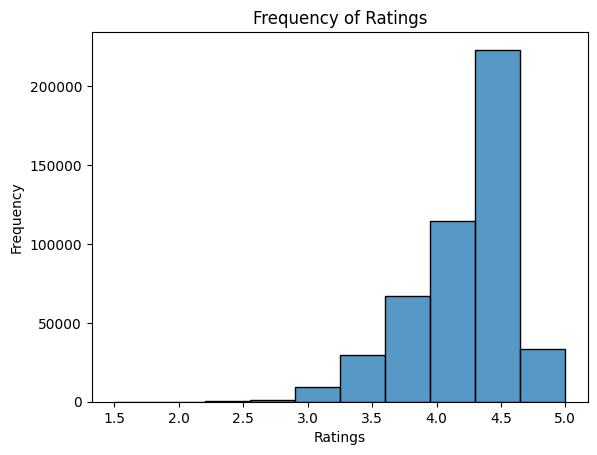

In [47]:
# Assuming 'ratings' is the name of the column in your DataFrame
sns.histplot(data=filtered_df, x='avg_rating', bins=10)  # You can adjust the number of bins as needed
plt.title('Frequency of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


In [48]:
filtered_df.avg_rating.value_counts()

4.4    68008
4.5    60790
4.3    51993
4.2    50605
4.6    42218
4.1    35181
4.0    28683
4.7    20642
3.9    20400
3.8    17450
3.7    16440
3.5    13022
3.6    12684
3.3     9325
4.8     8707
3.4     7104
3.2     3486
4.9     3415
3.1     2850
2.9     1598
3.0     1558
2.8      897
5.0      841
2.6      196
2.7      100
2.4       53
2.2       50
2.5       42
2.1       38
1.8       30
2.3       23
1.7       17
1.9       12
1.5       11
Name: avg_rating, dtype: int64

In [49]:
# Filter the DataFrame for years 2018 to 2021
filtered_df_year = filtered_df[(filtered_df['year'] >= 2018) & (filtered_df['year'] <= 2021)]

# Create the pivot table with mean ratings
pivot_table = pd.pivot_table(filtered_df_year, values='avg_rating', columns='year', aggfunc='mean', fill_value=0)

# Optionally, you can reset the index to make 'rating' a column instead of the index
pivot_table = pivot_table.reset_index()

# Display the pivot table
print(pivot_table)



year       index     2018      2019      2020      2021
0     avg_rating  4.17422  4.177449  4.218257  4.254359


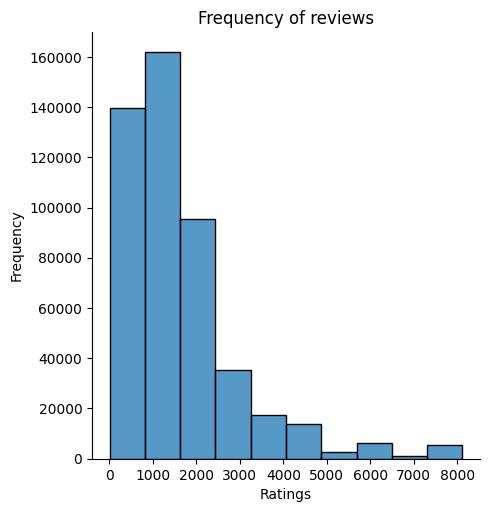

In [50]:
# Assuming 'ratings' is the name of the column in your DataFrame
sns.displot(data=filtered_df, x='num_of_reviews', bins=10)  # You can adjust the number of bins as needed
plt.title('Frequency of reviews')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [51]:
filtered_df.num_of_reviews.value_counts()

38      2972
8116    2945
58      2845
938     2355
7470    2325
        ... 
22        13
23        13
41        13
42        10
32         8
Name: num_of_reviews, Length: 878, dtype: int64

In [52]:
filtered_df.num_of_reviews.max()

8116

In [53]:
filtered_df.num_of_reviews.min()

8

In [54]:
filtered_df_year.year.value_counts()

2019    172735
2018    134435
2020    100898
2021     70401
Name: year, dtype: int64

In [55]:
filtered_df.price.value_counts()

₩₩      142735
₩       118440
$        88539
$$       75733
₩₩₩       9087
$$$       3025
₩₩₩₩      3006
$$$$       382
Name: price, dtype: int64

In [56]:
filtered_df['price'] = filtered_df['price'].str.replace('₩', '$')

In [57]:
filtered_df.price.value_counts()

$$      218468
$       206979
$$$      12112
$$$$      3388
Name: price, dtype: int64

In [58]:
pd.set_option('display.max_colwidth', 300)
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [59]:
filtered_df.MISC.sample(7)


2121947    {'Service options': ['Outdoor seating', 'No-contact delivery', 'Delivery', 'Takeaway', 'Dine-in'], 'Health and safety': ['Mask required', 'Staff wear masks', 'Staff required to disinfect surfaces between visits'], 'Highlights': ['Great cocktails', 'Great coffee', 'Great dessert'], 'Popular for':...
1167950    {'Service options': ['Curbside pickup', 'Delivery', 'Drive-through', 'Takeaway', 'Dine-in'], 'Highlights': ['Active military discounts', 'Fast service', 'Great coffee', 'Play area'], 'Popular for': ['Breakfast', 'Lunch', 'Dinner', 'Solo dining'], 'Accessibility': ['Wheelchair-accessible car park...
1369555                                                                                                                                                                                 {'Service options': ['Curbside pickup', 'In-store shopping', 'Delivery'], 'Accessibility': ['Wheelchair accessible entrance']}
2784320    {'Service options': ['Outdoor seating', 'Delivery', 'Tak

In [60]:
import ast
# Convert the string representations of dictionaries to actual dictionaries
filtered_df['MISC'] = filtered_df['MISC'].apply(lambda x: ast.literal_eval(x) if x is not None else {})
# Create a set to collect unique attribute names
unique_attributes = set()

# Iterate through the 'MISC' column to collect attribute names
for misc_dict in filtered_df['MISC']:
    unique_attributes.update(misc_dict.keys())

# Extract the values for each attribute and create new columns
for attribute in unique_attributes:
    filtered_df[attribute] = filtered_df['MISC'].apply(lambda x: x.get(attribute, []))

# Drop the original 'MISC' column
filtered_df.drop(columns=['MISC'], inplace=True)

# Print the result
print(filtered_df)

              user_id               name_x                    time  rating  \
3696     1.155553e+20          Hand Pipkin 2021-03-05 08:12:30.931       5   
3697     1.155553e+20          Hand Pipkin 2021-03-05 08:12:30.931       5   
3698     1.168684e+20              RBL MIA 2019-04-11 21:09:02.530       5   
3699     1.168684e+20              RBL MIA 2019-04-11 21:09:02.530       5   
3700     1.089802e+20       Andres Cabrera 2020-08-24 02:17:49.143       1   
...               ...                  ...                     ...     ...   
2866445  1.178976e+20      Migda Rodriguez 2019-06-19 11:41:06.110       5   
2866446  1.157899e+20       Jey Candelario 2019-07-04 20:18:57.847       2   
2866447  1.086188e+20          Сергей Серп 2019-03-31 17:27:12.647       5   
2866448  1.147855e+20        Jamie Jackson 2019-06-21 22:41:44.005       5   
2866449  1.112114e+20  Gerardo carrasquero 2019-09-06 11:45:53.851       5   

                                                               

In [61]:
filtered_df.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'pics', 'resp',
       'gmap_id', 'name_y', 'address', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'state',
       'relative_results', 'url', 'geometry', 'Category_exp', 'year',
       'Highlights', 'Service options', 'Payments', 'Planning',
       'From the business', 'Offerings', 'Atmosphere', 'Accessibility',
       'Popular for', 'Dining options', 'Health and safety', 'Amenities',
       'Health & safety', 'Crowd'],
      dtype='object')

In [62]:
filtered_df[['Category_exp','Dining options', 'Health & safety', 'Service options','From the business', 'Highlights', 'Atmosphere', 'Popular for','Accessibility', 'Payments', 'Amenities', 'Planning', 'Crowd', 'Offerings']]

,Category_exp,Dining options,Health & safety,Service options,From the business,Highlights,Atmosphere,Popular for,Accessibility,Payments,Amenities,Planning,Crowd,Offerings
3696,['Restaurant'],[],[],"[Dine-in, Delivery]",[],[],[Casual],"[Lunch, Solo dining]",[Wheelchair accessible entrance],[],[],[],[Groups],[]
3697,['Restaurant'],[],[],"[Dine-in, Delivery]",[],[],[Casual],"[Lunch, Solo dining]",[Wheelchair accessible entrance],[],[],[],[Groups],[]
3698,['Restaurant'],[],[],"[Dine-in, Delivery]",[],[],[Casual],"[Lunch, Solo dining]",[Wheelchair accessible entrance],[],[],[],[Groups],[]
3699,['Restaurant'],[],[],"[Dine-in, Delivery]",[],[],[Casual],"[Lunch, Solo dining]",[Wheelchair accessible entrance],[],[],[],[Groups],[]
3700,['Restaurant'],[],[],"[Dine-in, Delivery]",[],[],[Casual],"[Lunch, Solo dining]",[Wheelchair accessible entrance],[],[],[],[Groups],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866445,"['American restaurant', 'Caterer', 'Chicken restaurant', 'Restaurant']","[Lunch, Dinner, Catering, Dessert, Seating]",[],"[Curbside pickup, No-contact delivery, Delivery, Takeaway, Dine-in]",[],"[Fast service, LGBTQ-friendly, Transgender safe space]",[Casual],"[Lunch, Dinner, Solo dining]","[Wheelchair-accessible car park, Wheelchair-accessible entrance, Wheelchair-accessible seating, Wheelchair-accessible toilet]","[Debit cards, Credit cards]","[Good for kids, High chairs, Toilets]",[],"[Family friendly, Groups, Tourists]","[Comfort food, Healthy options, Kids' menu, Quick bite]"
2866446,"['American restaurant', 'Caterer', 'Chicken restaurant', 'Restaurant']","[Lunch, Dinner, Catering, Dessert, Seating]",[],"[Curbside pickup, No-contact delivery, Delivery, Takeaway, Dine-in]",[],"[Fast service, LGBTQ-friendly, Transgender safe space]",[Casual],"[Lunch, Dinner, Solo dining]","[Wheelchair-accessible car park, Wheelchair-accessible entrance, Wheelchair-accessible seating, Wheelchair-accessible toilet]","[Debit cards, Credit cards]","[Good for kids, High chairs, Toilets]",[],"[Family friendly, Groups, Tourists]","[Comfort food, Healthy options, Kids' menu, Quick bite]"
2866447,"['American restaurant', 'Caterer', 'Chicken restaurant', 'Restaurant']","[Lunch, Dinner, Catering, Dessert, Seating]",[],"[Curbside pickup, No-contact delivery, Delivery, Takeaway, Dine-in]",[],"[Fast service, LGBTQ-friendly, Transgender safe space]",[Casual],"[Lunch, Dinner, Solo dining]","[Wheelchair-accessible car park, Wheelchair-accessible entrance, Wheelchair-accessible seating, Wheelchair-accessible toilet]","[Debit cards, Credit cards]","[Good for kids, High chairs, Toilets]",[],"[Family friendly, Groups, Tourists]","[Comfort food, Healthy options, Kids' menu, Quick bite]"
2866448,"['American restaurant', 'Caterer', 'Chicken restaurant', 'Restaurant']","[Lunch, Dinner, Catering, Dessert, Seating]",[],"[Curbside pickup, No-contact delivery, Delivery, Takeaway, Dine-in]",[],"[Fast service, LGBTQ-friendly, Transgender safe space]",[Casual],"[Lunch, Dinner, Solo dining]","[Wheelchair-accessible car park, Wheelchair-accessible entrance, Wheelchair-accessible seating, Wheelchair-accessible toilet]","[Debit cards, Credit cards]","[Good for kids, High chairs, Toilets]",[],"[Family friendly, Groups, Tourists]","[Comfort food, Healthy options, Kids' menu, Quick bite]"


In [63]:
filtered_df["Atmosphere"].unique()

TypeError: ignored

In [ ]:
# Reset column width to default (truncate long columns)
pd.reset_option('display.max_colwidth')

# Reset the maximum number of rows displayed (truncation)
pd.reset_option('display.max_rows')

# Reset the maximum number of columns displayed (truncation)
pd.reset_option('display.max_columns')

In [ ]:
filtered_df.name_x.value_counts()

In [ ]:
filtered_df_with_text = filtered_df[filtered_df['text'].notna()]

In [ ]:
filtered_df_with_text.name_x.value_counts()

In [ ]:
filtered_df_with_text.address.nunique()